In [245]:
# Import our dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import gmaps
import scipy.stats as stats

# Google developer API key
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

In [246]:
# Take in all of our data and read it into pandas
crimedata_newyork = "Crime_Data/NewYork_Crime_Data.csv"
crimedata_austin = "Crime_Data/Austin_Crime_Data.csv"
crimedata_la = "Crime_Data/LA_Crime_Data.csv"
crimedata_chicago = "Crime_Data/Chicago_Crime_Data.csv"

crimedata_newyork_df = pd.read_csv(crimedata_newyork)
crimedata_austin_df = pd.read_csv(crimedata_austin)
crimedata_la_df = pd.read_csv(crimedata_la)
crimedata_chicago_df = pd.read_csv(crimedata_chicago)

In [247]:
crimedata_newyork_df["city"] = "New York"

In [248]:
crimedata_newyork_df.head()

,Date,Latitude,Longitude,city
0,11/26/1912,NaN,NaN,New York
1,7/20/1918,40.756044,-73.986950,New York
2,8/8/1918,40.675146,-73.918003,New York
3,8/18/1918,40.633016,-73.944756,New York
4,11/4/1918,40.721512,-73.993096,New York


In [249]:
# Store latitude and longitude in locations
locations = crimedata_newyork_df[["Latitude", "Longitude"]].astype(float)

In [250]:
# Fill NaN values and convert to float
location = crimedata_newyork_df[["Latitude", "Longitude"]].astype(float)

In [251]:
crimedata_newyork_df["Date"] = crimedata_newyork_df["Date"].astype("datetime64")

In [252]:
crimedata_newyork_df_sorted = crimedata_newyork_df.sort_values(by=["Date"])
crimedata_newyork_df_sorted.head()

,Date,Latitude,Longitude,city
0,1912-11-26,NaN,NaN,New York
1,1918-07-20,40.756044,-73.986950,New York
2,1918-08-08,40.675146,-73.918003,New York
3,1918-08-18,40.633016,-73.944756,New York
4,1918-11-04,40.721512,-73.993096,New York


In [234]:
newyork_2018_1 = crimedata_newyork_df_sorted.loc[crimedata_newyork_df_sorted["Date"] >= "2018-01-01", :]
newyork_2018_1.head()

,Date,Latitude,Longitude,city
12334,2018-01-01,40.703597,-74.013115,New York
12333,2018-01-01,40.764718,-73.827990,New York
12332,2018-01-01,40.736833,-73.988750,New York
12327,2018-01-01,40.657647,-73.928084,New York
12335,2018-01-01,40.875177,-73.853931,New York


In [253]:
newyork_2018 = newyork_2018_1.loc[newyork_2018_1["Date"] <= "2018-12-31", :]
newyork_2018.head()

,Date,Latitude,Longitude,city
12334,2018-01-01,40.703597,-74.013115,New York
12333,2018-01-01,40.764718,-73.827990,New York
12332,2018-01-01,40.736833,-73.988750,New York
12327,2018-01-01,40.657647,-73.928084,New York
12335,2018-01-01,40.875177,-73.853931,New York


In [254]:
len(newyork_2018)

452996

In [255]:
newyork_2018_w = len(newyork_2018.loc[((newyork_2018["Date"] >= "2018-01-01") &
                               (newyork_2018["Date"] <= "2018-03-20")) |
                               (newyork_2018["Date"] >= "2018-12-21")])

newyork_2018_s = len(newyork_2018.loc[((newyork_2018["Date"] >= "2018-03-21") &
                               (newyork_2018["Date"] <= "2018-06-20"))])
                    
newyork_2018_ss = len(newyork_2018.loc[((newyork_2018["Date"] >= "2018-06-20") &
                               (newyork_2018["Date"] <= "2018-09-21"))])

newyork_2018_f = len(newyork_2018.loc[((newyork_2018["Date"] >= "2018-09-22") &
                               (newyork_2018["Date"] <= "2018-12-20"))])

In [256]:
print(f"Winter: {newyork_2018_w}")
print(f"Spring: {newyork_2018_s}")
print(f"Summer: {newyork_2018_ss}")
print(f"Fall: {newyork_2018_f}")

Winter: 105636
Spring: 118026
Summer: 123935
Fall: 106857


In [257]:
seasons = ["Winter", "Spring", "Summer", "Fall"]
crime = [newyork_2018_w, newyork_2018_s, newyork_2018_ss, newyork_2018_f]
colors = ["lightgreen", "red", "yellow", "lightskyblue"]
explode = (0, 0, 0.05, 0)

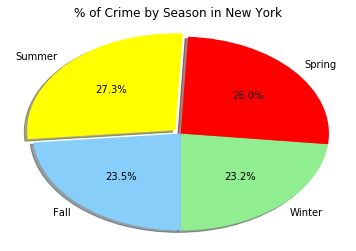

In [258]:
plt.title("% of Crime by Season in New York")
plt.pie(crime, explode=explode, labels=seasons, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
plt.axis("auto")
plt.show()

Text(0, 0.5, '# of Crime')

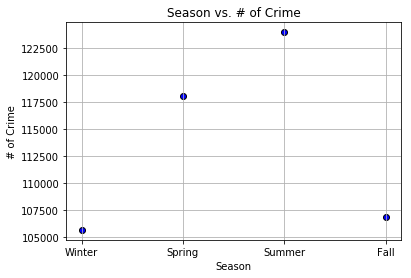

In [259]:
seasons = ["Winter", "Spring", "Summer", "Fall"]
crime = [newyork_2018_w, newyork_2018_s, newyork_2018_ss, newyork_2018_f]

# Use matplotlib to create a scatter plot based upon the above data
plt.scatter(seasons, crime, marker="o", facecolors="blue", linewidth=1, edgecolors="black")

# Create a title, x label, and y label for our chart
title = f"Season vs. # of Crime"
plt.title(title)
plt.grid(True)
plt.xlabel("Season")
plt.ylabel("# of Crime")

In [262]:
# Observed data in a (hypothetical) survey of 300 people 
observed = pd.Series([105636,118026,123935,106857], index=["Winter", "Spring", "Summer", "Fall"])

In [263]:
# Create a data frame
df = pd.DataFrame([observed]).T

In [264]:
# Add a column whose default values are the expected values
df[1] = 113613.5

In [265]:
# Rename columns
df.columns = ["Observed", "Expected"]

In [266]:
# View the data frame
df

,Observed,Expected
Winter,105636,113613.5
Spring,118026,113613.5
Summer,123935,113613.5
Fall,106857,113613.5


In [276]:
# The degree of freedom is 4-1 = 3
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 3)

In [277]:
# The critical value
critical_value

7.814727903251179

In [278]:
# Run the chi square test with stats.chisquare()
stats.chisquare(df['Observed'], df['Expected'])

Power_divergenceResult(statistic=2071.00667614324, pvalue=0.0)

In [241]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=location,  
                                 dissipating=False, max_intensity=10,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

InvalidPointException: nan is not a valid latitude. Latitudes must lie between -90 and 90.

In [29]:
crimedata_austin_df["city"] = "Austin"

In [30]:
crimedata_austin_df.head()

,Date Location,city
"3/23/2019\t""(30.33354183","-97.70576196)""",Austin
"3/23/2019\t""(30.26800598","-97.73895531)""",Austin
"3/23/2019\t""(30.26167703","-97.71877525)""",Austin
"3/23/2019\t""(30.39829057","-97.74402237)""",Austin
"3/23/2019\t""(30.26435664","-97.73680064)""",Austin


In [31]:
crimedata_la_df["city"] = "LA"

In [32]:
crimedata_la_df.head()

,Date Location,city
"11/3/2015\t""(34.1577","-118.3727)""",LA
"10/30/2015\t""(34.1681","-118.3724)""",LA
"11/4/2015\t""(34.203","-118.3779)""",LA
"4/28/2015\t""(34.1513","-118.3642)""",LA
"10/27/2015\t""(34.1912","-118.3891)""",LA


In [33]:
crimedata_chicago_df["city"] = "Chicago"

In [34]:
crimedata_chicago_df.head()

,Date,Location,city
0,3/16/2002 20:00,"(41.909751735, -87.677444707)",Chicago
1,8/4/2005 20:29,"(41.794553764, -87.645168317)",Chicago
2,9/10/2005 22:00,"(41.920953473, -87.640041873)",Chicago
3,9/10/2005 21:00,"(41.894400275, -87.750685427)",Chicago
4,9/11/2005 10:10,"(41.731270595, -87.598257728)",Chicago


In [35]:
combined_crime = pd.concat([crimedata_newyork_df,crimedata_austin_df, crimedata_la_df, crimedata_chicago_df],axis=0, sort=False)
combined_crime.head()

,Date,Latitude,Longitude,city,Date Location,Date Location,Location
0,11/28/2018,NaN,NaN,New York,NaN,NaN,NaN
1,12/31/2018,40.756044,-73.986950,New York,NaN,NaN,NaN
2,12/31/2018,40.675146,-73.918003,New York,NaN,NaN,NaN
3,12/31/2018,40.633016,-73.944756,New York,NaN,NaN,NaN
4,12/31/2018,40.721512,-73.993096,New York,NaN,NaN,NaN


In [36]:
combined_crime.shape

(3609790, 7)

In [37]:
crimedata_newyork_df.shape[0] + crimedata_austin_df.shape[0]

1512640

In [38]:
crimedata_austin_df.head()

,Date Location,city
"3/23/2019\t""(30.33354183","-97.70576196)""",Austin
"3/23/2019\t""(30.26800598","-97.73895531)""",Austin
"3/23/2019\t""(30.26167703","-97.71877525)""",Austin
"3/23/2019\t""(30.39829057","-97.74402237)""",Austin
"3/23/2019\t""(30.26435664","-97.73680064)""",Austin


In [39]:
crimedata_la_df.head()

,Date Location,city
"11/3/2015\t""(34.1577","-118.3727)""",LA
"10/30/2015\t""(34.1681","-118.3724)""",LA
"11/4/2015\t""(34.203","-118.3779)""",LA
"4/28/2015\t""(34.1513","-118.3642)""",LA
"10/27/2015\t""(34.1912","-118.3891)""",LA


In [40]:
crimedata_chicago_df.head()

,Date,Location,city
0,3/16/2002 20:00,"(41.909751735, -87.677444707)",Chicago
1,8/4/2005 20:29,"(41.794553764, -87.645168317)",Chicago
2,9/10/2005 22:00,"(41.920953473, -87.640041873)",Chicago
3,9/10/2005 21:00,"(41.894400275, -87.750685427)",Chicago
4,9/11/2005 10:10,"(41.731270595, -87.598257728)",Chicago
